In [7]:
from essentia.standard import Resample, MonoLoader, MonoWriter
import numpy as np
from scipy.io.wavfile import read as wavread, write as wavwrite
from matplotlib import pyplot as plt
import pyaudio
import wave
from scipy import signal
from scipy.interpolate import interp1d
from numpy.fft import fft, fftfreq

%matplotlib inline

In [2]:
# To begin, let's load in some original speech and define some constants.
FILE_NAME = "4.wav"
FILE_PATH = "Data/wave/{}".format(FILE_NAME)
NFFT = 1024
[fs, speech] = wavread(FILE_PATH)

In [33]:
# Define some useful functions

# Opens the file and plays it via an output audio stream.
def play_audio(file_name):
    wf = wave.open(file_name, 'r')
    p = pyaudio.PyAudio()
    stream = p.open(format=p.get_format_from_width(wf.getsampwidth()),
                    channels=wf.getnchannels(),
                    rate=wf.getframerate(),
                    output=True)

    # play the audio in chunks
    data = wf.readframes(512)
    while data != '':
        stream.write(data)
        data = wf.readframes(512)

    # close everything
    stream.stop_stream()
    stream.close()
    p.terminate()

# Define some simple functions to aid in looking at the time/frequency domains of the speech.
def plot_time_domain(signal, title_keyword):
    plt.plot(signal)
    plt.title("Time Domain of {}".format(title_keyword))
    plt.xlabel("sample [n]")
    plt.ylabel("amplitude")
    plt.show()
    
def plot_spectrogram(signal, fs, title_keyword):
    [S, freqs, bins, _] = plt.specgram(signal, NFFT=NFFT, Fs=fs, window=np.hamming(NFFT), pad_to=NFFT)
    plt.title("Spectrogram of {}".format(title_keyword))
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")
    plt.show()
    
def plot_dft(signal, title_keyword):
    X = fft(signal, n=NFFT)
    freqs = fftfreq(NFFT)
    plt.plot(freqs, abs(np.real(X)))
    plt.title("DFT Magnitude of {}".format(title_keyword))
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")
    plt.show()

def observe_signal(signal, title_keyword="", fs=16000):
    plt.subplot(211)
    plot_time_domain(signal, title_keyword)
    plt.subplot(212)
    plot_spectrogram(signal, fs, title_keyword)


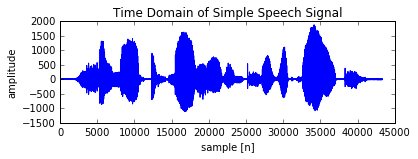

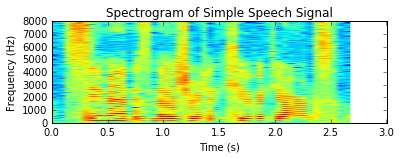

In [31]:
# Take a look at the unaltered speech in the time and frequency domains while it plays.
# Notice the higher frequencies present during fricatives.
observe_signal(speech, "Simple Speech Signal")
# play_audio(FILE_PATH)

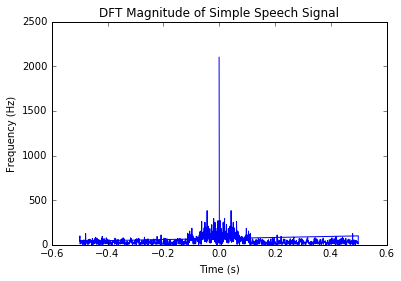

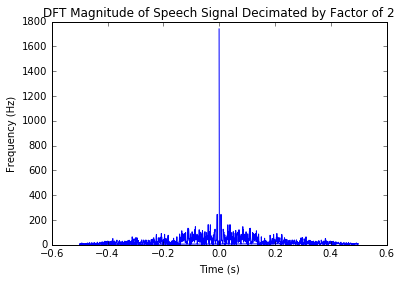

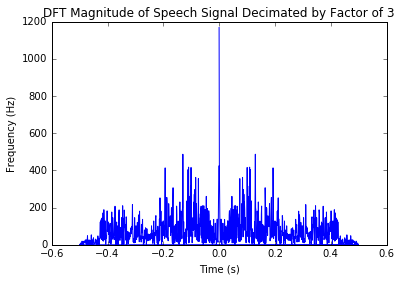

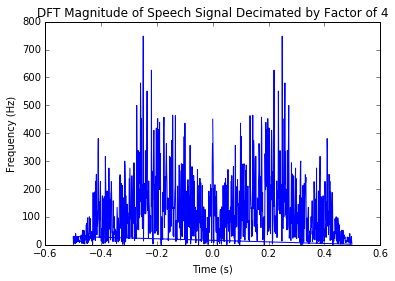

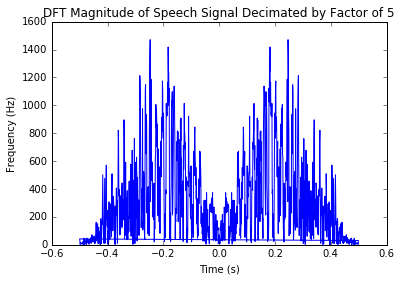

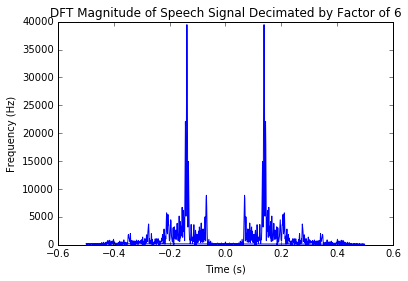

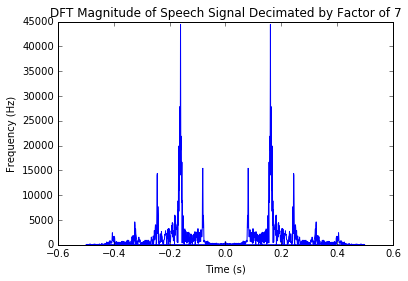

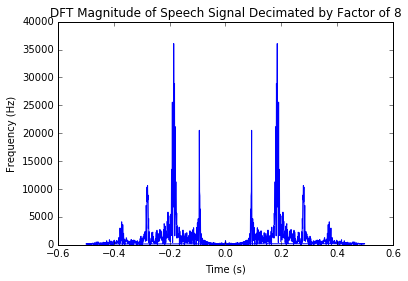

In [38]:
# Now take a look at how much aliasing affects the signal as we decimate by increasing factors.
# Note that taking the DFT of the full speech segment isn't really useful for anything but looking at
# the effect of aliasing on the signal's spectrum.

# Plot the original spectrum
plot_dft(speech, "Simple Speech Signal")

# Decimate by increasing factors, and show each spectrum.
# Note the change of y-axis scale as the decimation factor increases. Don't be fooled by the change of appearance.
for decimation_factor in [2, 3, 4, 5, 6, 7, 8]:
    decimated = signal.decimate(speech, decimation_factor).astype("int16")
    plot_dft(decimated, "Speech Signal Decimated by Factor of {}".format(decimation_factor))